# 0. colab 파일 기본 세팅

In [19]:
# 구글 드라이브 마운트(cjyjob1993@gmail.com)
from google.colab import drive
drive.mount('/content/drive')

# lib 디렉토리를을 환경 변수에 추가
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/myCode/lib')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# 커스텀 라이브러리 임포트
from func_debug_log import debug

In [21]:
# debug_log (0 : 미출력, 1 : 섹션 구분 출력, 2 : 함수 실행, 3 : 조건문 출력, 4 : 반복문 출력, 5 : 함수 내부 출력, 6 : 변수 출력)
debug_flag = 6

In [22]:
if debug_flag in range(1,7) : debug('Section : colab 파일 기본 세팅', __name__)

2022.12.03 07:54:21 __main__ Section : colab 파일 기본 세팅


# 1. 문제 : 주가 분석

## [1] 목표 : 투자 수익 획득

## [2] 방법 : 기본적 분석과 기술적 분석

### <1> 기본적 분석 
+ 사회, 문화, 경제, 정치적 요인 등 외부 요인과 회사의 상태, 운영, 자본 등 내부 요인을 종합적으로 고려햐여, 회사의 본래 가치를 분석하는 것.
+ 딥러닝 기술을 접목시키기에 부적절한 특성이 많음.
  + 외부 요인을 파악하기 위한 정보를 매우 다양한 경로(신문, 재무제표, SNS, 영상 뉴스, 증권 정보, ...)를 통해 취득. 
  + 취득한 정보가 정형화 되어 있지 않음.(수치 - 주가 데이터, 텍스트 - 기사, 영상 - 뉴스, 음성 - 회사 홍보실 통화 ... )
  + 취득 불가능한 정보 (회사 내부 정보 등)
  + 수치화 하기 힘든 정보 (회사가 추구하는 가치, 운영 방침, 행동 양식)
  + 특정하기 불가능할 정도로 다양한 변수가 존재함. - 한번에 고려하려면, 차원의 저주가 불가피함
  + 분석 과정이 복잡함.
    + 예를 들어, 유가 상승과 특정 회사의 주가가 같이 상승할때, 이를 분석하기 위해 다음과 같은 것들을 고려할 수 있다.
      > + 유가 상승 이유 - 생산 감소, 소비 증가
      >  + 생산 감소, 소비 증가 이유 - 정치, 사회, 회사 내부 요인 고려
      >  + 생산 감소, 소비 증가 여파 - 유가 상승으로 인한 화폐 가치 변화, 사회적 활동 변화, 소비 형태 변화, 시장 구조 변화
      > + 주가 상승 이유 - 내부 요인(회사 활동에서 석유와의 연관성), 외부 요인(정치/사회/문화/경제 -  화폐 가치 하락)
      > + 두 현상이 화폐의 영향처럼 다양한 방면에서 갖는 연관성 고려 
    + 위의 요소들 자체도 다양한 변수가 맞물려 있어, 각각을 파악하기 위한 딥러닝 모델과 데이터 파이프라인이 필요하고 이로 해결 불가한 경우도 존재, 또 이들을 종합하여 각 변수의 영향력을 판단하는 것 역시 추가적인 딥러닝 모델이 필요하다. 

### <2> 기술적 분석
+ 투자자를 분석하여 주가의 움직임을 파악하는 것.
+ 상대적으로 딥러닝 적용이 용이함
  + 투자자를 파악할 수 있는 정보가 한정적임(고려할 변수가 적음)
    + 주가, 지수, 환율 (증권 정보) : 명확해서 별도의 전처리가 필요 없고, 수치로 표현되어 있어 딥러닝에 적합
    + SNS : 감성분석, 양을 통한 투자자 집단 전반에 대한 평가 가능
    + 그 외의 정보는 대체로 획득할 경로가 없을 뿐 아니라, 개인정보이므로 획득 자체도 불가함)
  + 변수간 연관성이 단순함(연결할 변수가 거의 없음)

### <3> 주가 및 지수의 기술적 분석 종류 

#### (1) 시계열 분석(캔들 패턴 분석)
+ 증권 정보(주가, 지수, 환율, 등)는 시간에 따라 변화하는 수치형 정보임
+ 흐름 형태를 유지하는 분석(캔들 패턴)이 필요.
+ (https://usstockfly.com/%EC%BA%94%EB%93%A4-%ED%8C%A8%ED%84%B4-%EC%A0%95%EB%A6%AC/)

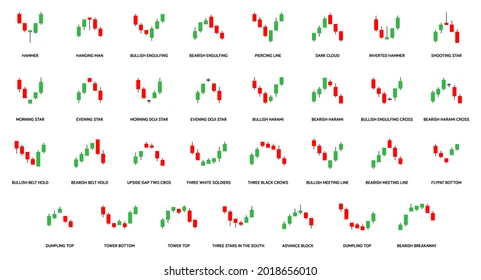

#### (2) 지지·저항 분석

+ 주가는 특정 수치를 기준으로 움직임
+ 이전 수치의 최고점, 최저점, 최빈점을 기준으로 삼음. 이때, 최고점, 최저점의 주가를 나타내는 선을 지지선 혹은 저항선이라 표현함.





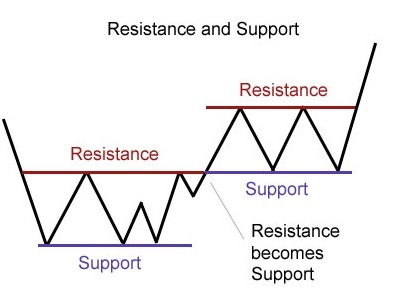

#### (3) 추세 분석
+ 주가는 일반적으로 개별 주체의 행동 결과로 파동의 형태를 띄며, 추세를 따라 움직임
+ 일반적으로 상승 추세선은 저점을 연결해, 하락 추세선은 고점들을 연결해 결정   
 이때, 두 추세선의 기울기 부호 조합에 따라, 추세를 세분화 할 수 있음
  + 상승 추세 : 수렴, 발산, 평행 
  + 횡보 추세 : 수렴, 발산, 평행 
  + 하락 추세 : 수렴, 발산, 평행




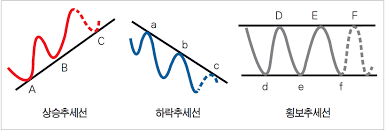

# 2. 데이터
상기한 딥러닝 분석에 대한 적합성을 바탕으로, 국내 주가 데이터 선정

## [1] 데이터 획득

+ FinanceDataReader (https://financedata.github.io/index.html)  
한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리


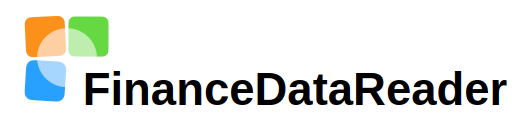

In [23]:
if debug_flag in range(1,7) : debug('Section : 데이터 획득', __name__)

2022.12.03 07:54:21 __main__ Section : 데이터 획득


In [24]:
if debug_flag in range(2,7) : debug('라이브러리 설치', __name__)
!pip install -U finance-datareader

2022.12.03 07:54:21 __main__ 라이브러리 설치
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
if debug_flag in range(2,7) : debug('라이브러리 임포트', __name__)
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import os.path          

2022.12.03 07:54:21 __main__ 라이브러리 임포트


In [26]:
if debug_flag in range(2,7) : debug('KOSPI, KOSDAQ 종목 메타 데이터 획득', __name__)
df_kospi = fdr.StockListing('KOSPI')
df_kosdaq = fdr.StockListing('KOSDAQ')

2022.12.03 07:54:21 __main__ KOSPI, KOSDAQ 종목 메타 데이터 획득


In [27]:
if debug_flag in range(6,7) : debug(f'종목 메타 데이터 확인\n\n{df_kospi.head(3)}\n{df_kosdaq.head(3)}', __name__)

2022.12.03 07:54:21 __main__ 종목 메타 데이터 확인

     Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0  005930  KR7005930003      삼성전자  KOSPI        60400          2    -2200   
1  373220  KR7373220003  LG에너지솔루션  KOSPI       584000          2    -1000   
2  207940  KR7207940008  삼성바이오로직스  KOSPI       870000          2   -14000   

   ChagesRatio    Open    High     Low    Volume        Amount  \
0        -3.51   62500   62500   60400  15331184  935960853120   
1        -0.17  585000  590000  578000    239024  139765656000   
2        -1.58  884000  885000  870000     37710   32966593000   

            Marcap      Stocks MarketId  
0  360574866020000  5969782550      STK  
1  136656000000000   234000000      STK  
2   61921380000000    71174000      STK  
     Code        ISU_CD      Name         Market   Dept   Close ChangeCode  \
0  247540  KR7247540008    에코프로비엠  KOSDAQ GLOBAL  우량기업부  109900          2   
1  091990  KR7091990002  셀트리온헬스케어  KOSDAQ GLOBAL  우량기업부   6

In [28]:
if debug_flag in range(2,7) : debug('kospi, kosdaq 종목 code 리스트 획득', __name__)
df_kospi = df_kospi['Code']
df_kosdaq = df_kosdaq['Code']

2022.12.03 07:54:21 __main__ kospi, kosdaq 종목 code 리스트 획득


In [29]:
if debug_flag in range(2,7) : debug('통합 종목 code 리스트 생성', __name__)
df_codes = pd.concat([df_kospi, df_kosdaq], ignore_index=True)

2022.12.03 07:54:21 __main__ 통합 종목 code 리스트 생성


In [30]:
if debug_flag in range(6,7) : debug(f'통합 종목 리스트 확인 \n{df_codes}\n{type(df_codes)}', __name__)

2022.12.03 07:54:21 __main__ 통합 종목 리스트 확인 
0       005930
1       373220
2       207940
3       000660
4       051910
         ...  
2549    405350
2550    08537M
2551    021045
2552    050540
2553    032685
Name: Code, Length: 2554, dtype: object
<class 'pandas.core.series.Series'>


In [36]:
if debug_flag in range(2,7) : debug(f'코스피 종목 별 2022년도 주가 데이터 불러오기', __name__)

file = '/content/drive/MyDrive/Colab Notebooks/myCode/Project/data/stock_price.csv'

if os.path.isfile(file):
  if debug_flag in range(6,7) : debug(f'주가 데이터 파일을 불러옵니다', __name__)
  df_stock_price = pd.read_csv(file)
else :
  if debug_flag in range(6,7) : debug(f'주가 데이터를 라이브러리로 불러옵니다.', __name__)
  df_stock_price = pd.DataFrame()
  # 코스닥, 코스피 전체 종목의 2022년도 데이터는 56만개 row가 되면서, 전처리로 세션이 다운된다. 
  for k in df_kospi: # 때문에, 코스피만 : df_codes -> df_kospi
    x = fdr.DataReader(k, '2022-09-01') # 3개월 정도 데이터로 수행. '2022' -> '2022-09-01'
    x['code'] = str(k)
    df_stock_price = pd.concat([df_stock_price, x])
  if debug_flag in range(6,7) : debug(f'주가 데이터를 파일로 저장합니다.', __name__)
  df_stock_price = df_stock_price.reset_index()
  df_stock_price.to_csv(file , index=False)

2022.12.03 07:54:21 __main__ 코스피 종목 별 2022년도 주가 데이터 불러오기
2022.12.03 07:54:21 __main__ 주가 데이터 파일을 불러옵니다


In [37]:
df_stock_price

,Date,Open,High,Low,Close,Volume,Change,code
0,2022-09-01,58700,58900,58300,58400,14905777,-0.021776,005930
1,2022-09-02,58300,58600,57500,57500,15040310,-0.015411,005930
2,2022-09-05,57400,57800,56800,57100,11425977,-0.006957,005930
3,2022-09-06,57200,57600,56900,57100,7503086,0.000000,005930
4,2022-09-07,56700,56700,55900,56000,17384854,-0.019264,005930
...,...,...,...,...,...,...,...,...
59261,2022-11-28,19700,19700,19250,19400,153,-0.012723,000547
59262,2022-11-29,19300,19350,19150,19350,173,-0.002577,000547
59263,2022-11-30,19300,19450,19300,19300,76,-0.002584,000547
59264,2022-12-01,19550,21700,19550,21400,4526,0.108808,000547


## [2] 데이터 전처리
+ 라이브러리를 활용해 가져온 데이터는 일별로 시가, 고가, 저가, 종가, 거래량을 나타냄.
+ 주, 월 단위로 동일한 형태를 갖도록 전처리 -> 다른 시간 단위에 대해서도 분석을 용이하게 수행할 수 있음.

In [38]:
if debug_flag in range(1,7) : debug(f'데이터 전처리', __name__)

2022.12.03 07:54:21 __main__ 데이터 전처리


In [39]:
if debug_flag in range(6,7) : debug('회귀문제 label 생성', __name__)
df_stock_price['label_regg'] = df_stock_price['Change']

2022.12.03 07:54:21 __main__ 회귀문제 label 생성


In [40]:
if debug_flag in range(6,7) : debug('이진분류문제 label 생성', __name__)
tmp_bin = df_stock_price['Change'].values
df_stock_price['label_bin'] = pd.Series(np.where(tmp_bin > 0.0033, 1, 0))

2022.12.03 07:54:21 __main__ 이진분류문제 label 생성


In [204]:
def slideForDeep(df, codes, yes) :
  if debug_flag in range(3,7) : debug('Deeplearning을 위한 데이터 reshape 진행', __name__)
  result = pd.DataFrame()
  for code in codes :
    features = ['label_regg', 'label_bin', 'Close', 'Low', 'Open', 'High']
    tmp = df[df['code'] == code].reset_index(drop=True)
    end = tmp.shape[0]
    tmp_ = tmp.drop(range(end-yes, end),axis = 0).reset_index(drop=True)
    _tmp = tmp.drop(range(0, yes),axis = 0).reset_index(drop=True)

    for feature in features :
      extracted_col = _tmp[feature]
      tmp_.insert(1, feature+f'_-{yes}', extracted_col)
    result = pd.concat([result, tmp_]).reset_index(drop=True)
    features.extend(['Date', 'Volume', 'Change', 'code'])
    result = result.drop(columns = features)
    result.columns
    print(result)
  return result

In [205]:
if debug_flag in range(3,7) : debug('딥러닝 모델의 입력값으로, 1~5일간의 ohlc 데이터 사용', __name__)
processed_data = df_stock_price.drop(columns = ['Volume', 'Change'])
for i in range(1, 6) :
  deep_data = slideForDeep(df_stock_price, df_stock_price['code'].unique(), i)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1513  78200    78100    76600   76600     0            -0.024204     
1514  78500    77200    76500   76900     1             0.003916     
1515  79000    76800    75700   78900     1             0.026008     
1516  80300    80200    78100   78800     0            -0.001267     
1517  79800    78800    78000   79800     1             0.012690     
1518  79400    78700    77900   78800     0            -0.012531     
1519  79100    78200    77600   77800     0            -0.012690     
1520  80200    79600    77600   78900     1             0.014139     
1521  78800    78800    75600   77300     0            -0.020279     
1522  77900    76500    75900   77800     1             0.006468     
1523  79800    78900    78000   79500     1             0.021851     
1524  80700    79800    78600   79000     0            -0.006289     
1525  80000    79700    77500   79200     0             0.002532     
1526  81700    78700    78300   81400     1           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3495  10750    10650    10400   10500     0            -0.018692     
3496  10550    10500    10350   10450     0            -0.004762     
3497  10500    10450    10250   10250     0            -0.019139     
3498  10550    10350    10300   10450     1             0.019512     
3499  10600    10350    10300   10550     1             0.009569     
3500  10900    10650    10650   10900     1             0.033175     
3501  10950    10900    10700   10900     0             0.000000     
3502  11100    10900    10750   11100     1             0.018349     
3503  11350    11000    10950   11250     1             0.013514     
3504  11300    11300    11000   11200     0            -0.004444     
3505  11250    11200    11100   11250     1             0.004464     
3506  11400    11200    11200   11250     0             0.000000     
3507  11450    11250    11150   11400     1             0.013333     
3508  11550    11400    11300   11400     0           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1076  164500   157000   155500  161500    1             0.018927     
1077  164500   158500   158000  163000    1             0.009288     
1078  164000   163500   155000  162000    0            -0.006135     
1079  165000   161000   158500  158500    0            -0.021605     
1080  164500   162000   159000  160000    1             0.009464     
1081  171500   157500   156500  171000    1             0.068750     
1082  186000   174500   170000  183000    1             0.070175     
1083  195000   185000   183500  189500    1             0.035519     
1084  192000   189000   186000  191000    1             0.007916     
1085  193500   189500   184000  187000    0            -0.020942     
1086  194500   191000   187500  194500    1             0.040107     
1087  205000   196500   194500  198000    1             0.017995     
1088  199500   198500   194000  195000    0            -0.015152     
1089  201000   197000   195500  199000    1           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2378  118000   115000   114000  117000    1             0.008621     
2379  116500   115500   113000  114500    0            -0.021368     
2380  117500   114000   113500  117500    1             0.026201     
2381  117500   117000   113000  113000    0            -0.038298     
2382  116000   115000   114000  115500    1             0.022124     
2383  121000   116000   115000  117000    1             0.012987     
2384  118500   118000   115500  118000    1             0.008547     
2385  121000   118000   117000  118500    1             0.004237     
2386  122000   118000   117500  120500    1             0.016878     
2387  121500   120500   119000  120000    0            -0.004149     
2388  123000   122000   119000  120000    0             0.000000     
2389  121000   120500   119500  120500    1             0.004167     
2390  123000   120500   119500  121500    1             0.008299     
2391  124000   122500   121500  123000    1           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3556  81000    78500    77800   80100     1             0.006281     
3557  78900    78000    75900   76600     0            -0.043695     
3558  77500    76600    75200   77300     1             0.009138     
3559  77300    77200    74000   74000     0            -0.042691     
3560  76900    75700    75200   75400     1             0.018919     
3561  75600    74400    72700   74800     0            -0.007958     
3562  76900    76300    72900   74100     0            -0.009358     
3563  75200    74500    73000   73000     0            -0.014845     
3564  74400    73000    71800   72900     0            -0.001370     
3565  73000    72800    70300   71500     0            -0.019204     
3566  73300    72400    71000   71600     0             0.001399     
3567  71200    70500    69200   69700     0            -0.026536     
3568  70300    69500    68600   69300     0            -0.005739     
3569  71800    69700    69000   71600     1           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4734  135000   122000   122000  134500    1             0.084677     
4735  137000   134500   129500  131500    0            -0.022305     
4736  135500   132000   130000  135000    1             0.026616     
4737  135500   133500   129500  129500    0            -0.040741     
4738  138000   131500   131500  136500    1             0.054054     
4739  138000   135500   132500  136500    0             0.000000     
4740  139000   136500   135000  135500    0            -0.007326     
4741  138000   136000   134500  135500    0             0.000000     
4742  139000   135500   134500  139000    1             0.025830     
4743  139000   139000   133500  134500    0            -0.032374     
4744  137500   137000   134000  135000    1             0.003717     
4745  137500   136500   131000  132000    0            -0.022222     
4746  134000   132500   129500  131500    0            -0.003788     
4747  133500   133000   130500  133000    1           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5726   36050    34550    34400   36050     1             0.043415     
5727   35450    35450    33800   34500     0            -0.042996     
5728   34900    34800    33900   34550     0             0.001449     
5729   34500    34500    32450   32450     0            -0.060781     
5730   34200    33200    32950   34200     1             0.053929     
5731   33750    33450    32800   33500     0            -0.020468     
5732   34850    33850    33850   34850     1             0.040299     
5733   34850    34750    33900   34100     0            -0.021521     
5734   35000    34100    33850   34450     1             0.010264     
5735   34250    34250    33250   33350     0            -0.031930     
5736   33900    33850    33300   33550     1             0.005997     
5737   33650    33550    33050   33350     0            -0.005961     
5738   33600    33350    33000   33400     0             0.001499     
5739   34900    33150    33150   34550   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6594   30050    29450    29450   30000     1             0.020408     
6595   30300    29650    29500   29800     0            -0.006667     
6596   30350    29800    29600   29800     0             0.000000     
6597   30550    30000    29600   30300     1             0.016779     
6598   31400    30600    30400   31150     1             0.028053     
6599   32300    31150    30900   32200     1             0.033708     
6600   32650    32300    32050   32600     1             0.012422     
6601   33300    32650    32300   33100     1             0.015337     
6602   33450    32850    32750   33300     1             0.006042     
6603   33250    33000    32300   33150     0            -0.004505     
6604   33300    33300    31850   32300     0            -0.025641     
6605   32600    32600    31700   32050     0            -0.007740     
6606   32200    31700    31700   32000     0            -0.001560     
6607   32500    32450    31700   32100   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [190]:
df = processed_data

In [198]:
 df[df.isna( ).any(axis=1)].shape

(4712, 38)

In [136]:

if debug_flag in range(2,7) : debug('train, test 데이터 분할', __name__)
train = pd.DataFrame()
test = pd.DataFrame()
groups = df_stock_price.groupby('code')
for code in df_codes[:10] :
  data = groups.get_group(code)
  split_data_index = int(data.shape[0]*0.8)
  tmp_train, tmp_test = data[:split_data_index], data[split_data_index:]
  train = pd.concat([train, tmp_train])
  test = pd.concat([test, tmp_test])

2022.12.03 04:49:49 __main__ train, test 데이터 분할


In [86]:
features = ['Open', 'High', 'Low', 'Close']
target_regg = 'label_regg'
target_bin = 'label_bin'

In [88]:
X_train = df_stock_price[features]

In [89]:
y_regg = df_stock_price[target_regg]

In [90]:
y_bin = df_stock_price[target_bin]

# 3. 딥러닝 모델

In [54]:
if debug_flag in range(1,7) : debug(f'LSTM 모델 생성 및 학습', __name__)

2022.12.03 04:49:49 __main__ 딥러닝 모델 생성 및 학습


In [55]:
if debug_flag in range(6,7) : debug('LSTM 라이브러리 임포트', __name__)


2022.12.03 04:49:49 __main__ LSTM 라이브러리 임포트


In [56]:
if debug_flag in range(6,7) : debug('LSTM 파라미터 설정', __name__)

2022.12.03 04:49:49 __main__ LSTM 파라미터 설정


In [61]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 구축', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 생성


In [62]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 컴파일', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 컴파일


In [63]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 요약 출력', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 생성


In [64]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 학습', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 학습


In [65]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 시각화', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 시각화


# 4. 한계 및 보완

## [1] 한계점


### <1> 기본적 분석의 부재
+ 투자자는 회사의 가치를 바탕으로 투자하며, 주가는 투자자의 행동 결과로 결정됨.   
즉, 기본적 분석과 기술적 분석은 양립하며, 동시에 고려되어야만 정확한 주가 분석이 가능함.

## [2] 보완점